#### Setup

In [2]:
# setup 
import numpy as np
import matplotlib.pyplot as plt
from arrau.a2d import Arr2d
from arrau.a3d import Arr3d
from fullwavepy.plot.misc import plot_square
from fullwavepy.seismic.misc import Box3d
from fullwavepy.seismic.plots import plot_mod
from fullwavepy.seismic.proteus import PROTEUS
from fullwavepy.config.logging import *
from fullwavepy.project.types.basic import ProjInv
from plotea.mpl2d import figure
log_lvl(ERROR)
b01 = Box3d(8,25, -3,15, 0,4)
b02 = Box3d(8,18,  4,14, 0,4)
# b02 = Box3d(11,15,  7,11, 0,4)
path = '/home/kmc3817/c_projects_phd/fwi_sant_kolumbo/'
geom = {'box': list(np.array(b01.box)*1000), 'dt': 0.0025, 'dx': 50, 'ns': 2000}
p14 = ProjInv('p14', path=path, cat=0, **geom)
xp = PROTEUS()
xp.read_all()
bt01 = Arr2d(xp.read_bathy_topo().extract(np.array(b01.xy)*1e3).arr/1e3, extent=b01.xy)
bt02 = bt01.extract(extent=b02.xy)
svp = Arr3d(p14.o.vp.it[0].read()/1e3, extent=b01.extent).extract(b02.extent)

vp_it = {}
for it in [160]:
    vp_it[it] = Arr3d(p14.o.vp.it[it].read()/1e3, extent=b01.extent).extract(b02.extent)

# V. 01

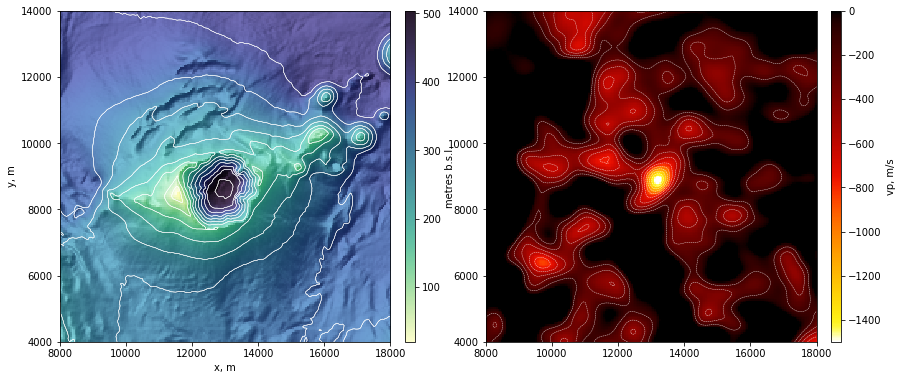

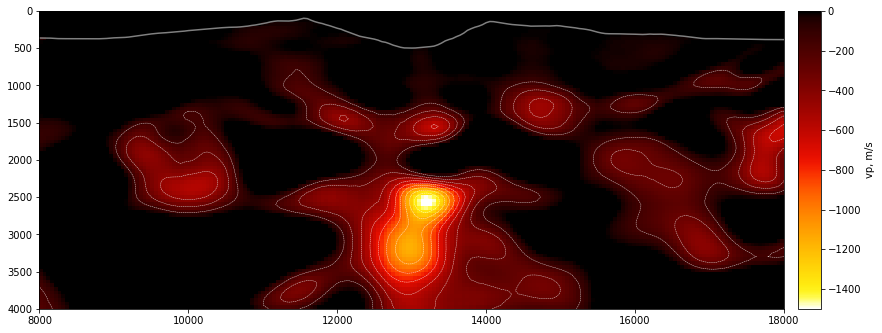

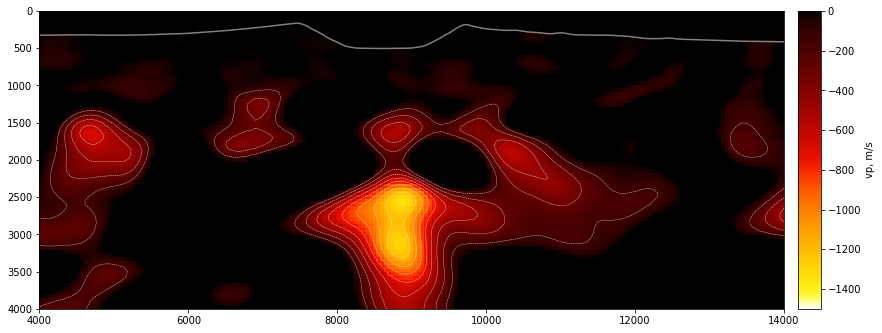

In [20]:
# plot 
it = 160
from matplotlib.gridspec import GridSpec
gs = GridSpec(1,2) #, height_ratios=[1,1]) 
fig = figure(14,14)
ax = fig.add_subplot(gs[0,0])
bt02.plot(mode='shade', cmap='cmo.deep', label='metres b.s.l.')
bt02.plot(mode='cr', colors='w')
ax = fig.add_subplot(gs[0,1])
plot_mod(p14, b02, bt02, svp, it=it, axis=2, value=2.5e3, vmin=-1.5e3)
fig = figure(14,14)
plot_mod(p14, b02, bt02, svp, it=it, axis=1, value=9e3, vmin=-1.5e3)
fig = figure(14,14)
plot_mod(p14, b02, bt02, svp, it=it, axis=0, value=13e3, vmin=-1.5e3)

# V. 02
ref = mean-svp 1d model

In [44]:
# calc anomaly 
vp = vp_it[160]
ref = np.zeros(svp.shape)
ref = Arr3d(np.zeros(svp.shape), extent=b02.extent)
ref.arr[:] = np.mean(svp.arr, axis=(0,1))
vp = Arr3d((vp.arr - ref.arr), extent=b02.extent)
vp.arr[vp.arr > 0] = 0
vmin = np.min(vp.arr)

In [45]:
# slice 
kws = dict(value=8.9, axis=1, unit='km')
vp.slice(**kws)
bt02.slice(**kws)
kws = dict(value=13.2, axis=0, unit='km')
vp.slice(**kws)
bt02.slice(**kws)
kws = dict(value=2.55, axis=2, unit='km')
_ = vp.slice(**kws)

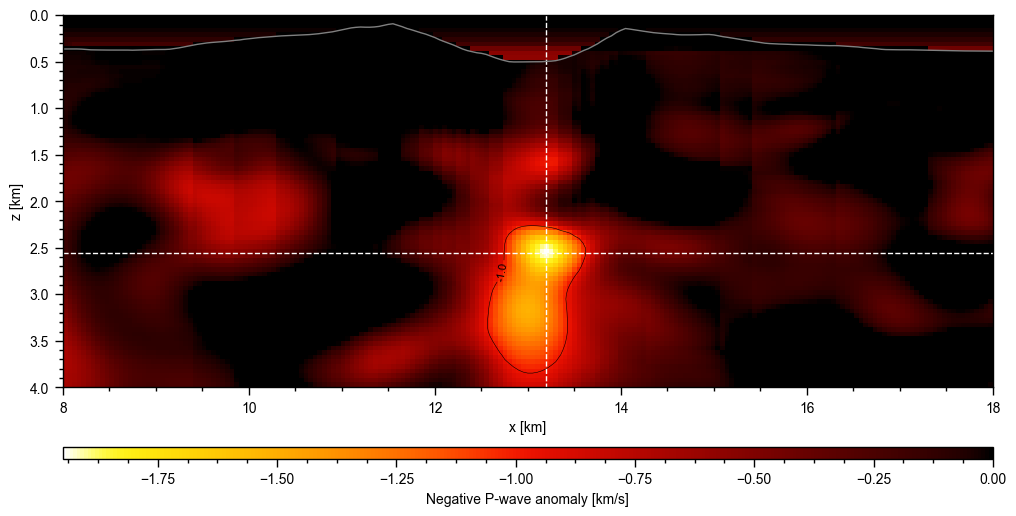

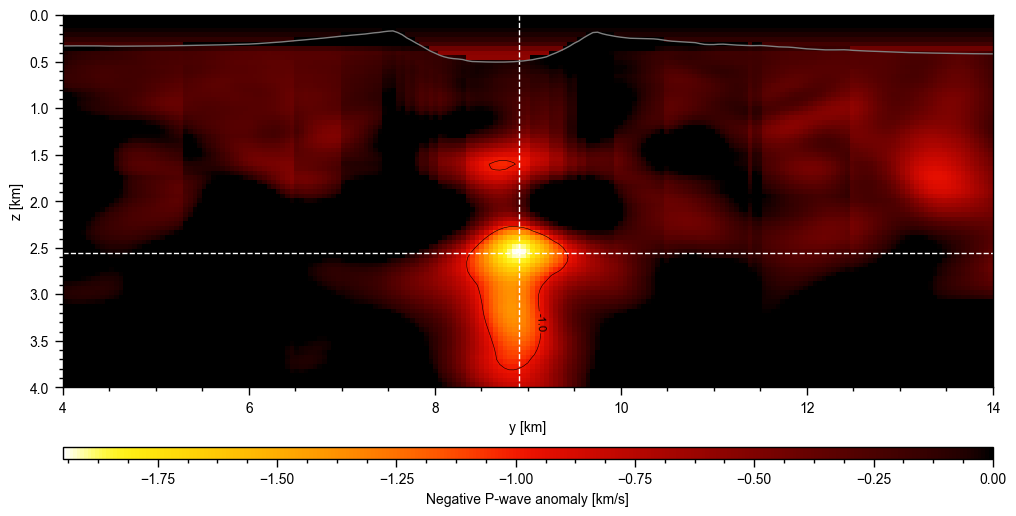

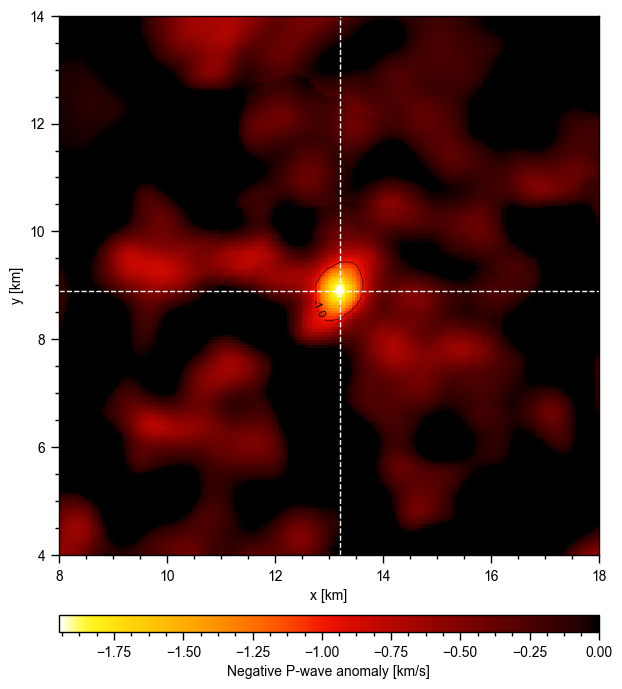

In [46]:
# plot 
bt = bt02
plt.style.reload_library()
plt.style.use(['default', 'paper2022kolumbo'])
for i, sl in enumerate(vp.slices.list):
    figure(12,8)
    sl.plot(mode='im+cr', cmap='cet_fire_r',  vmin=vmin, vmax=0,
            colors='k', linestyles='solid', levels=[-1.0],
            show_cntr_labels=True, fontsize=8, fmt='%1.1f',
            orientation='horizontal', position='bottom', pad=.6,
            label='Negative P-wave anomaly [km/s]',)
    sl.plot_slice_lines(color='w', linestyle='--')
    if i < 2:
        plt.gca().invert_yaxis()
        bt.slices.list[i].plot(color='Grey')
    if i == 0:
        plt.xlabel('x [km]')
        plt.ylabel('z [km]')
    elif i == 1:
        plt.xlabel('y [km]')
        plt.ylabel('z [km]')
    else:
        plt.xlabel('x [km]')
        plt.ylabel('y [km]')        

# V. 03
ref = svp

In [49]:
# calc anomaly 
vp = vp_it[160]
ref = svp
vp = Arr3d((vp.arr - ref.arr), extent=b02.extent)
vp.arr[vp.arr > 0] = 0
vmin = np.min(vp.arr)

In [50]:
# slice 
kws = dict(value=8.9, axis=1, unit='km')
vp.slice(**kws)
bt02.slice(**kws)
kws = dict(value=13.2, axis=0, unit='km')
vp.slice(**kws)
bt02.slice(**kws)
kws = dict(value=2.55, axis=2, unit='km')
_ = vp.slice(**kws)

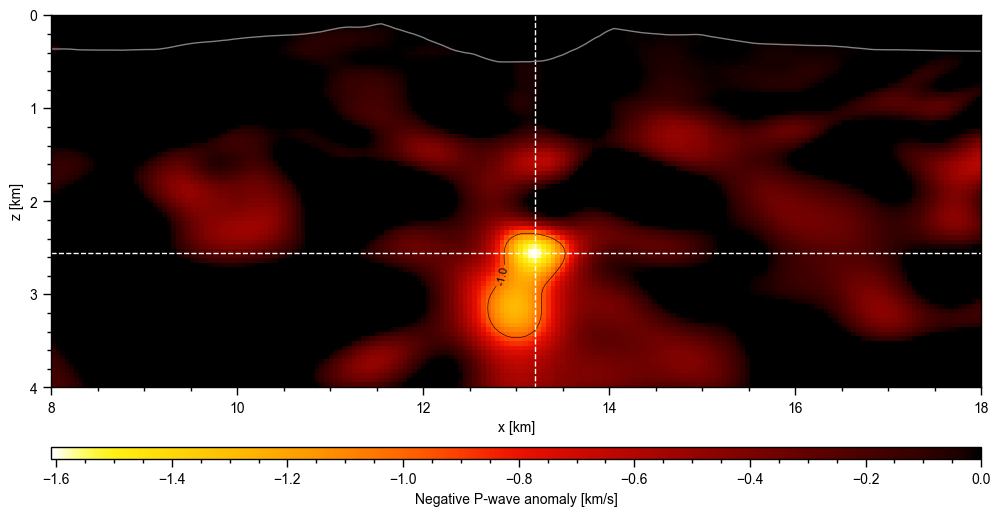

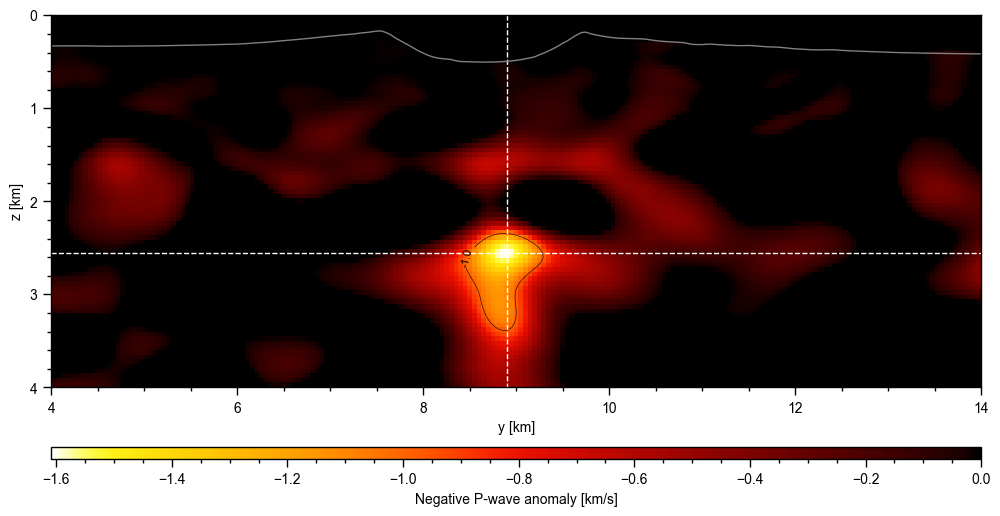

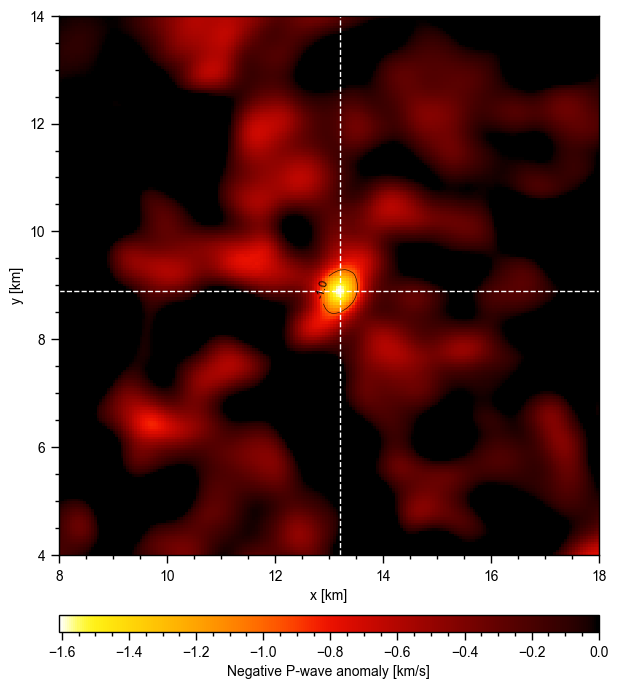

In [51]:
# plot 
bt = bt02
plt.style.reload_library()
plt.style.use(['default', 'paper2022kolumbo'])
for i, sl in enumerate(vp.slices.list):
    figure(12,8)
    sl.plot(mode='im+cr', cmap='cet_fire_r',  vmin=vmin, vmax=0,
            colors='k', linestyles='solid', levels=[-1.0],
            show_cntr_labels=True, fontsize=8, fmt='%1.1f',
            orientation='horizontal', position='bottom', pad=.6,
            label='Negative P-wave anomaly [km/s]',)
    sl.plot_slice_lines(color='w', linestyle='--')
    if i < 2:
        plt.yticks([0,1,2,3,4])
        plt.gca().invert_yaxis()
        bt.slices.list[i].plot(color='Grey')
    if i == 0:
        plt.xlabel('x [km]')
        plt.ylabel('z [km]')
    elif i == 1:
        plt.xlabel('y [km]')
        plt.ylabel('z [km]')
    else:
        plt.xlabel('x [km]')
        plt.ylabel('y [km]')        

# V. 04
rearranged

In [3]:
# calc anomaly 
vp = vp_it[160]
ref = svp
vp = Arr3d((vp.arr - ref.arr), extent=b02.extent)
vp.arr[vp.arr > 0] = 0
vmin = np.min(vp.arr)

In [45]:
# slice 
kws = dict(value=8.9, axis=1, unit='km')
vp.slice(**kws)
bt02.slice(**kws)
kws = dict(value=13.2, axis=0, unit='km')
vp.slice(**kws)
bt02.slice(**kws)
kws = dict(value=2.55, axis=2, unit='km')
_ = vp.slice(**kws)

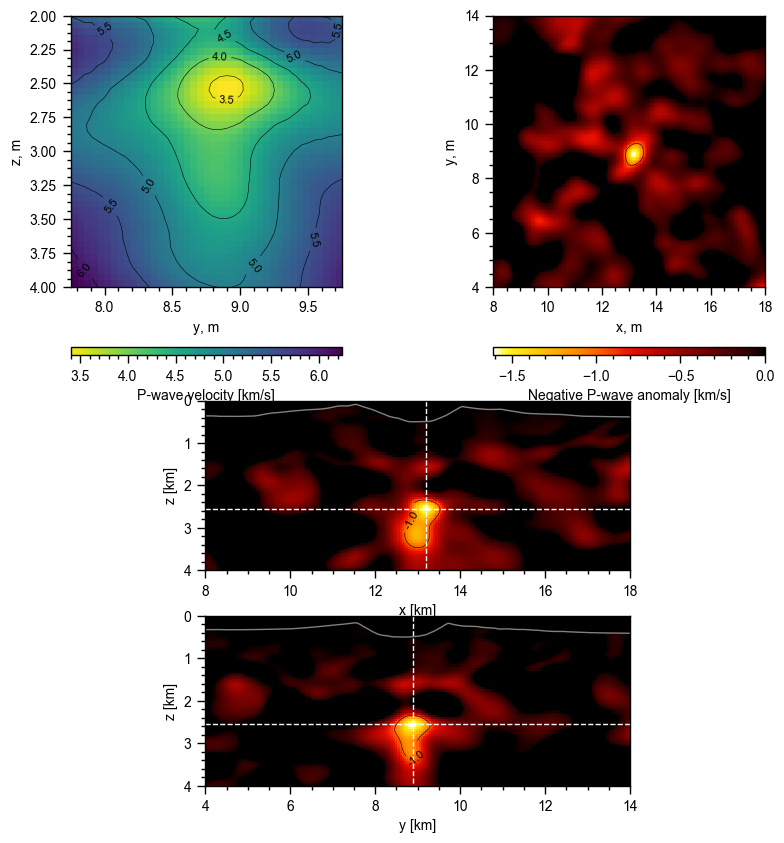

In [67]:
# plot 
from matplotlib.gridspec import GridSpec
plt.style.reload_library()
plt.style.use(['default', 'paper2022kolumbo'])
kw_anom = dict(mode='im+cr', cmap='cet_fire_r',  vmin=vmin, vmax=0,
            colors='k', linestyles='solid', levels=[-1.0],
            show_cntr_labels=True, fontsize=8, fmt='%1.1f',
            orientation='horizontal', position='bottom', pad=.6,
            label='Negative P-wave anomaly [km/s]')

gs = GridSpec(3,2, height_ratios=[2,1,1]) 
fig = figure(10,10)

# absolute vp
ax = fig.add_subplot(gs[0,0])
zoom = vp_it[160].extract(extent=[[12,14],[7.75,9.75],[2,4]]).slice(value=13.2, axis=0, unit='km')
zoom.plot(mode='im+cr', cmap='viridis_r', #vmin=1.5, vmax=6.5,
            colors='k', linestyles='solid', levels=5,
            show_cntr_labels=True, fontsize=8, fmt='%1.1f',
            orientation='horizontal', position='bottom', pad=.6,
            label='P-wave velocity [km/s]',)
ax.invert_yaxis()
# plt.yticks([2,3,4])

# anomaly - depth slice
ax = fig.add_subplot(gs[0,1])
vp.slices.list[2].plot(**kw_anom)

# anomaly - slice
ax = fig.add_subplot(gs[1,:])
i = 0
sl = vp.slices.list[i]
sl.plot(**kw_anom, cbar=False)
ax.invert_yaxis()
sl.plot_slice_lines(color='w', linestyle='--')
plt.yticks([0,1,2,3,4])
bt.slices.list[i].plot(color='Grey')
plt.xlabel('x [km]')
plt.ylabel('z [km]')

# anomaly - slice
ax = fig.add_subplot(gs[2,:])
i = 1
sl = vp.slices.list[i]
sl.plot(**kw_anom, cbar=False)
ax.invert_yaxis()
sl.plot_slice_lines(color='w', linestyle='--')
plt.yticks([0,1,2,3,4])
bt.slices.list[i].plot(color='Grey')
plt.xlabel('y [km]')
plt.ylabel('z [km]')
plt.show()

In [46]:
# plot 
bt = bt02
plt.style.reload_library()
plt.style.use(['default', 'paper2022kolumbo'])

# figure(12,8)
#     sl.plot(mode='im+cr', cmap='cet_fire_r',  vmin=vmin, vmax=0,
#             colors='k', linestyles='solid', levels=[-1.0],
#             show_cntr_labels=True, fontsize=8, fmt='%1.1f',
#             orientation='horizontal', position='bottom', pad=.6,
#             label='Negative P-wave anomaly [km/s]',)
#     sl.plot_slice_lines(color='w', linestyle='--')
#     if i < 2:
#         plt.yticks([0,1,2,3,4])
#         plt.gca().invert_yaxis()
#         bt.slices.list[i].plot(color='Grey')
#     if i == 0:
#         plt.xlabel('x [km]')
#         plt.ylabel('z [km]')
#     elif i == 1:
#         plt.xlabel('y [km]')
#         plt.ylabel('z [km]')
#     else:
#         plt.xlabel('x [km]')
#         plt.ylabel('y [km]')        

# V. 05

In [4]:
# calc anomaly 
vp = vp_it[160]
ref = svp
vp = Arr3d((vp.arr - ref.arr), extent=b02.extent)
vp.arr[vp.arr > 0] = 0
dvmin = np.min(vp.arr)

In [24]:
# slice 
kws = dict(value=8.9, axis=1, unit='km')
vp.slice(**kws)
bt02.slice(**kws)
kws = dict(value=13.2, axis=0, unit='km')
vp.slice(**kws)
bt02.slice(**kws)
kws = dict(value=2.55, axis=2, unit='km')
_ = vp.slice(**kws)

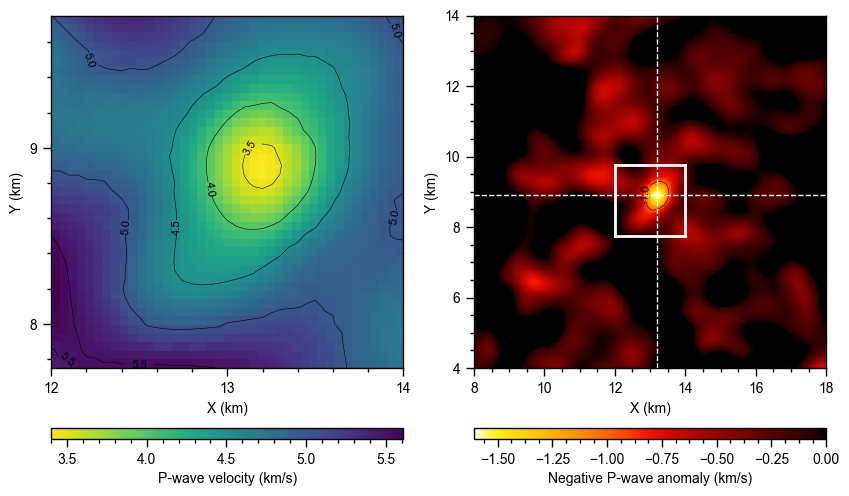

In [25]:
# plot 
from matplotlib.gridspec import GridSpec
plt.style.reload_library()
plt.style.use(['default', 'paper2022kolumbo'])
kw_anom = dict(mode='im+cr', cmap='cet_fire_r',  vmin=dvmin, vmax=0,
            colors='k', linestyles='solid', levels=[-1.0],
            show_cntr_labels=True, fontsize=8, fmt='%1.1f',
            orientation='horizontal', position='bottom', pad=.6,
            label='Negative P-wave anomaly (km/s)')

gs = GridSpec(1,2) #, height_ratios=[2,1,1]) 
fig = figure(10,10)

# absolute vp
ax = fig.add_subplot(gs[0,0])
x1, x2, y1, y2, z1, z2 = [12,14,7.75,9.75,2,4]
zoom = vp_it[160].extract(extent=[[x1,x2],[y1,y2],[z1,z2]]).slice(value=2.55, axis=2, unit='km')
vmin, vmax = float(np.min(zoom.arr)), float(np.max(zoom.arr))
kw_zoom = dict(mode='im+cr', cmap='viridis_r', vmin=vmin, vmax=vmax,
            colors='k', linestyles='solid', levels=np.arange(3.5,5.6,0.5),
            show_cntr_labels=True, fontsize=8, fmt='%1.1f')
zoom.plot(**kw_zoom, orientation='horizontal', position='bottom', pad=.6,
            label='P-wave velocity (km/s)',)
# ax.invert_yaxis()
plt.xticks([12,13,14])
plt.yticks([8,9])
plt.xlabel('X (km)')
plt.ylabel('Y (km)')


# anomaly - depth slice
ax = fig.add_subplot(gs[0,1])
sl = vp.slices.list[2]
sl.plot(**kw_anom)
sl.plot_slice_lines(color='w', linestyle='--')
kw_sq = dict(c='w', lw=2, ls='-', alpha=1)
plot_square(x1, x2, y1, y2, **kw_sq)
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.savefig('../manuscript/figures/fig02a.png', dpi=300)

In [167]:
help(zoomed_inset_axes)

Help on function zoomed_inset_axes in module mpl_toolkits.axes_grid1.inset_locator:

zoomed_inset_axes(parent_axes, zoom, loc='upper right', bbox_to_anchor=None, bbox_transform=None, axes_class=None, axes_kwargs=None, borderpad=0.5)
    Create an anchored inset axes by scaling a parent axes. For usage, also see
    :ref:`the examples <sphx_glr_gallery_axes_grid1_inset_locator_demo2.py>`.
    
    Parameters
    ----------
    parent_axes : `matplotlib.axes.Axes`
        Axes to place the inset axes.
    
    zoom : float
        Scaling factor of the data axes. *zoom* > 1 will enlargen the
        coordinates (i.e., "zoomed in"), while *zoom* < 1 will shrink the
        coordinates (i.e., "zoomed out").
    
    loc : int or string, optional, default to 1
        Location to place the inset axes. The valid locations are::
    
            'upper right'  : 1,
            'upper left'   : 2,
            'lower left'   : 3,
            'lower right'  : 4,
            'right'        : 5,
 

LUCKILY this white line on the bottom insets vanishes when saved on disk

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


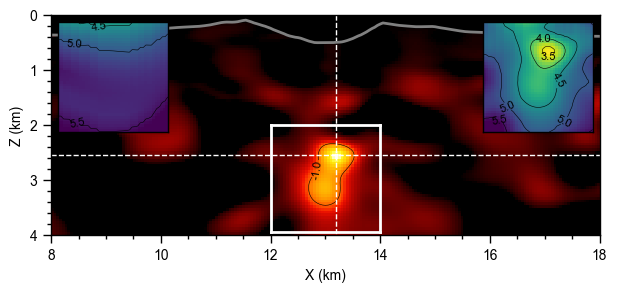

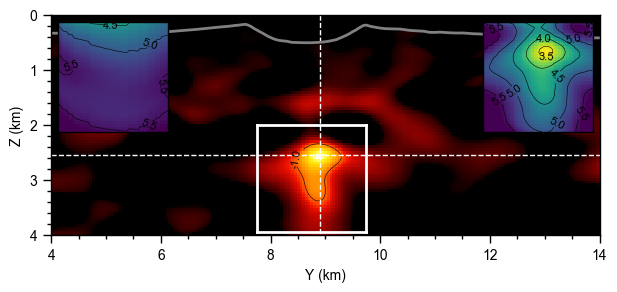

In [26]:
# anomaly - vertical slices
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
# gs = GridSpec(2,1) #, height_ratios=[2,1,1]) 
# fig = figure(10,10)
fig.set_tight_layout(dict(pad=.1)) #pad=.4) # , h_pad=None, w_pad=None, 
for i in [0,1]:
#     if i == 0:
#         continue
    fig = figure(6,6)
    fig.set_tight_layout(dict(pad=.1))
    gs = GridSpec(1,1)
    ax = fig.add_subplot(gs[0])
    sl = vp.slices.list[i]
    sl.plot(**kw_anom, cbar=False)
       
    ax.invert_yaxis()
    sl.plot_slice_lines(color='w', linestyle='--')
    plt.yticks([0,1,2,3,4])
    bt02.slices.list[i].plot(color='Grey')
    plt.ylabel('Z (km)')
    dz = 0.05 # for displaying purposes only
    if i == 0:
        value=8.9
        axis=1
        plt.xlabel('X (km)')
        corners = [x1,x2,z1,z2-dz]
    elif i == 1:
        value=13.2
        axis=0
        plt.xlabel('Y (km)')  
        corners = [y1,y2,z1,z2-dz]
    plot_square(*corners, **kw_sq) 
    for n, inset_vp in enumerate([svp, vp_it[160]]):
        if n == 0:
            loc='upper left'
        else:
            loc='upper right'
        axins = zoomed_inset_axes(ax, zoom=1, loc=loc, )   
        
        zoom = inset_vp.extract(extent=[[x1,x2],[y1,y2],[z1,z2]]).slice(
            value=value, axis=axis, unit='km')
        zoom.plot(**kw_zoom, cbar=0)    
        axins.set(xticks=[], yticks=[], xlabel='', ylabel='')
        plt.gca().invert_yaxis()
    if i == 0:
        bc = 'b'
    else:
        bc = 'c'
    plt.savefig('../manuscript/figures/fig02%s.png' %bc, dpi=300)        

In [96]:
zoom.axes[1].extent

[2, 4]

# V. 06
With positive anomalies as well

In [6]:
# calc anomaly 
vp = vp_it[160]
ref = svp
vp = Arr3d((vp.arr - ref.arr), extent=b02.extent)
# vp.arr[vp.arr > 0] = 0
vp_min, vp_max = np.min(vp.arr), np.max(vp.arr)
print('vp_min=%s, vp_max=%s' % (vp_min, vp_max))
vminmax = max(abs(vp_min), abs(vp_max))
vminmax = abs(np.min(vp.arr)) # to highlight negative, it will saturate positive scale
vminmax

vp_min=-1.6086879, vp_max=1.8538961


ModelVp(1.6086879, dtype=float32)

In [7]:
# slice 
kws = dict(value=8.9, axis=1, unit='km')
vp.slice(**kws)
bt02.slice(**kws)
kws = dict(value=13.2, axis=0, unit='km')
vp.slice(**kws)
bt02.slice(**kws)
kws = dict(value=2.55, axis=2, unit='km')
_ = vp.slice(**kws)

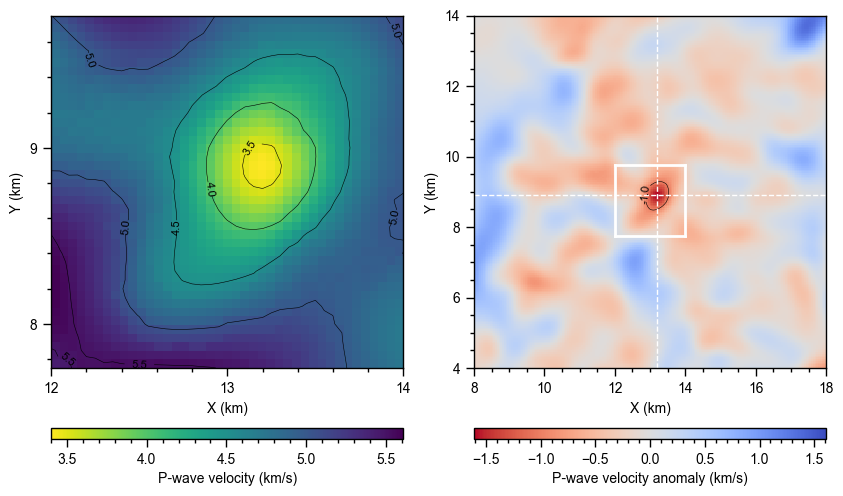

In [9]:
# plot 
from matplotlib.gridspec import GridSpec
plt.style.reload_library()
plt.style.use(['default', 'paper2022kolumbo'])
kw_anom = dict(mode='im+cr', cmap='coolwarm_r',  vmin=-vminmax, vmax=+vminmax,
            colors='k', linestyles='solid', levels=[-1.0],
            show_cntr_labels=True, fontsize=8, fmt='%1.1f',
            orientation='horizontal', position='bottom', pad=.6,
            label='P-wave velocity anomaly (km/s)')

gs = GridSpec(1,2) #, height_ratios=[2,1,1]) 
fig = figure(10,10)

# absolute vp
ax = fig.add_subplot(gs[0,0])
x1, x2, y1, y2, z1, z2 = [12,14,7.75,9.75,2,4]
zoom = vp_it[160].extract(extent=[[x1,x2],[y1,y2],[z1,z2]]).slice(value=2.55, axis=2, unit='km')
vmin, vmax = float(np.min(zoom.arr)), float(np.max(zoom.arr))
kw_zoom = dict(mode='im+cr', cmap='viridis_r', #vmin=vmin, vmax=vmax,
            colors='k', linestyles='solid', levels=np.arange(3.5,5.6,0.5),
            show_cntr_labels=True, fontsize=8, fmt='%1.1f')
zoom.plot(**kw_zoom, orientation='horizontal', position='bottom', pad=.6,
            label='P-wave velocity (km/s)',)
# ax.invert_yaxis()
plt.xticks([12,13,14])
plt.yticks([8,9])
plt.xlabel('X (km)')
plt.ylabel('Y (km)')


# anomaly - depth slice
ax = fig.add_subplot(gs[0,1])
sl = vp.slices.list[2]
sl.plot(**kw_anom)
sl.plot_slice_lines(color='w', linestyle='--')
kw_sq = dict(c='w', lw=2, ls='-', alpha=1)
plot_square(x1, x2, y1, y2, **kw_sq)
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.savefig('../manuscript/figures/fig02a_%s.png' % kw_anom['cmap'], dpi=300)

LUCKILY this white line on the bottom insets vanishes when saved on disk

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


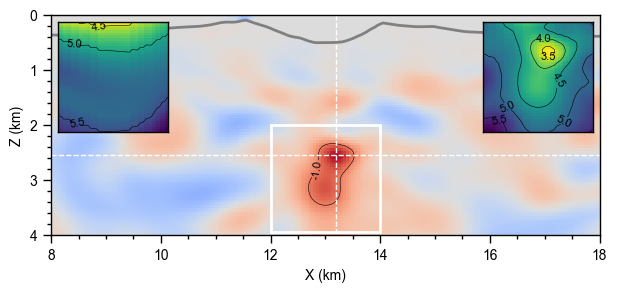

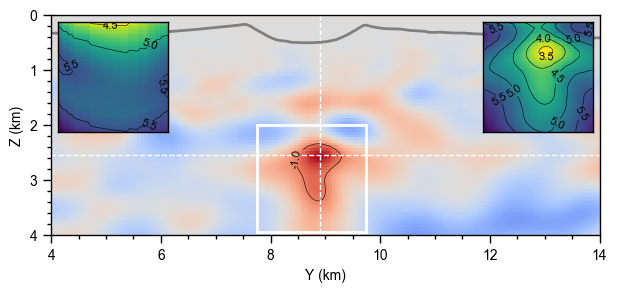

In [21]:
# anomaly - vertical slices
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
# gs = GridSpec(2,1) #, height_ratios=[2,1,1]) 
# fig = figure(10,10)
fig.set_tight_layout(dict(pad=.1)) #pad=.4) # , h_pad=None, w_pad=None, 
for i in [0,1]:
#     if i == 0:
#         continue
    fig = figure(6,6)
    fig.set_tight_layout(dict(pad=.1))
    gs = GridSpec(1,1)
    ax = fig.add_subplot(gs[0])
    sl = vp.slices.list[i]
    sl.plot(**kw_anom, cbar=False)
       
    ax.invert_yaxis()
    sl.plot_slice_lines(color='w', linestyle='--')
    plt.yticks([0,1,2,3,4])
    bt02.slices.list[i].plot(color='Grey')
    plt.ylabel('Z (km)')
    dz = 0.05 # for displaying purposes only
    if i == 0:
        value=8.9
        axis=1
        plt.xlabel('X (km)')
        corners = [x1,x2,z1,z2-dz]
    elif i == 1:
        value=13.2
        axis=0
        plt.xlabel('Y (km)')  
        corners = [y1,y2,z1,z2-dz]
    plot_square(*corners, **kw_sq) 
    for n, inset_vp in enumerate([svp, vp_it[160]]):
        if n == 0:
            loc='upper left'
        else:
            loc='upper right'
        axins = zoomed_inset_axes(ax, zoom=1, loc=loc, )   
        
        zoom = inset_vp.extract(extent=[[x1,x2],[y1,y2],[z1,z2]]).slice(
            value=value, axis=axis, unit='km')
        zoom.plot(**kw_zoom, cbar=0)    
        axins.set(xticks=[], yticks=[], xlabel='', ylabel='')
        plt.gca().invert_yaxis()
    if i == 0:
        bc = 'b'
    else:
        bc = 'c'
    plt.savefig('../manuscript/figures/fig02%s_%s.png' % (bc, kw_anom['cmap']), dpi=300)        

# ...